In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [37]:
# Starting from the most recent data point in the database. 
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
percip = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
percip_df = pd.DataFrame(percip, columns=["Date", "Percipitation"])
percip_df.set_index("Date", inplace=True)

# Sort the dataframe by date
percip_df.sort_values(by="Date", ascending=False)

# Show dataframe
percip_df



,Percipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


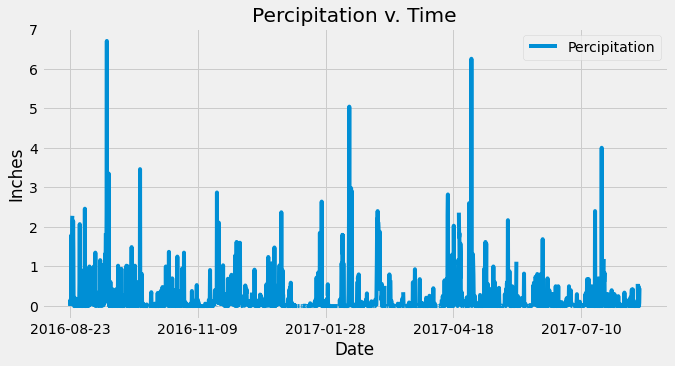

In [48]:
# Use Pandas Plotting with Matplotlib to plot the data
percip_df.plot(figsize=(10,5))
plt.title("Percipitation v. Time")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper right')

# Save image
plt.savefig("Images/precipitation.png")

# Show graph
plt.show()


In [49]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percip_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [50]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(measurement.station).count()
s

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()